Random Forest Regressor:
RMSE: 15.731124416322185
R2 Score: -0.016971737308242307
Random Forest Regressor saved as 'rf_math_model.pkl'
Decision Tree Regressor:
RMSE: 16.098127264571026
R2 Score: -0.06497659812970369
Feature columns saved as 'feature_columns.pkl'
Random Forest Classifier:
Accuracy: 0.64
Precision: 0.6858974358974359
Recall: 0.823076923076923
F1 Score: 0.7482517482517482
Random Forest Classifier saved as 'rf_passfail_model.pkl'

Feature Importances:
                                          Feature  Importance
10                                 lunch_standard    0.200768
0                                     gender_male    0.122806
11                   test preparation course_none    0.112106
8        parental level of education_some college    0.076927
6         parental level of education_high school    0.076053
2                          race/ethnicity_group C    0.067695
3                          race/ethnicity_group D    0.067354
5   parental level of education_bac

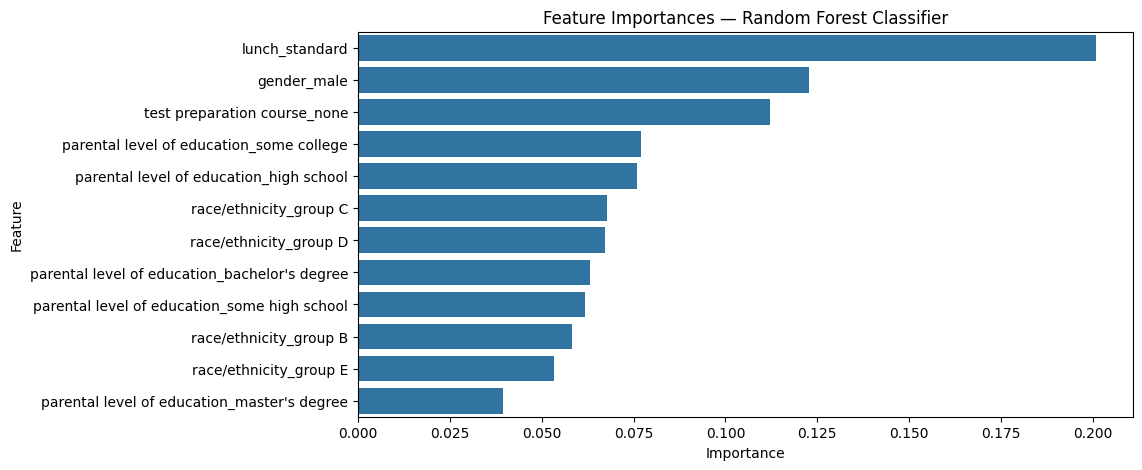

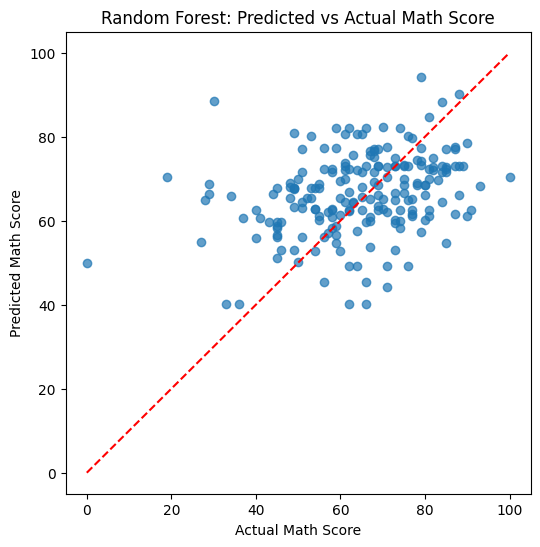

In [11]:
# ===========================
# Student Performance Predictive Modeling — Save Models Automatically
# ===========================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# ---------------------------
# Step 2: Load Dataset
# ---------------------------
df = pd.read_csv("StudentsPerformance.csv")

# ---------------------------
# Step 3: Regression — Features & Target
# ---------------------------
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['math score']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 4: Random Forest Regressor
# ---------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor:")
print("RMSE:", rmse)
print("R2 Score:", r2)

# Save the regression model
joblib.dump(rf_model, 'rf_math_model.pkl')
print("Random Forest Regressor saved as 'rf_math_model.pkl'")

# ---------------------------
# Step 5: Decision Tree Regressor
# ---------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor:")
print("RMSE:", rmse_dt)
print("R2 Score:", r2_dt)

# ---------------------------
# Step 6: Classification — Pass/Fail
# ---------------------------
df['pass_math'] = df['math score'].apply(lambda x: 1 if x >= 60 else 0)

X_cls = pd.get_dummies(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']], drop_first=True)
y_cls = df['pass_math']

# Save feature columns for later use
joblib.dump(X_cls.columns, 'feature_columns.pkl')
print("Feature columns saved as 'feature_columns.pkl'")

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# ---------------------------
# Step 7: Random Forest Classifier
# ---------------------------
rf_cls_model = RandomForestClassifier(random_state=42)
rf_cls_model.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls_model.predict(X_test_cls)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_rf_cls))
print("Precision:", precision_score(y_test_cls, y_pred_rf_cls))
print("Recall:", recall_score(y_test_cls, y_pred_rf_cls))
print("F1 Score:", f1_score(y_test_cls, y_pred_rf_cls))

# Save the classification model
joblib.dump(rf_cls_model, 'rf_passfail_model.pkl')
print("Random Forest Classifier saved as 'rf_passfail_model.pkl'")

# Feature Importances
importances = rf_cls_model.feature_importances_
features = X_cls.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances — Random Forest Classifier")
plt.show()

# Plot Predicted vs Actual (Regression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Random Forest: Predicted vs Actual Math Score")
plt.show()
